# Business Understanding

##### **Project Scenario**

Ride-hailing apps like Uber and Yassir depend heavily on real-time data and machine learning algorithms to automate and optimize their services. Accurate prediction of the Estimated Time of Arrival (ETA) is crucial for enhancing the reliability and attractiveness of Yassir's services. This prediction will have significant direct and indirect impacts on both customers and business partners. Improving ETA predictions will not only make Yassir's services more dependable but also allow the company to save money and allocate resources more effectively across other business areas.

##### **Problem Statement**

Yassir aims to optimize its service operations by accurately predicting the ETA for rides. The goal is to ensure that customers receive precise arrival times, improving their overall experience while allowing Yassir to manage resources more effectively and reduce operational costs.

##### **Objective**

The primary objective of this project is to develop machine learning models that accurately predict the ETA for a Yassir journey to enhance service reliability and customer satisfaction. By accurately forecasting the time it will take for a trip to reach its destination, Yassir can improve the customer experience, optimize operational efficiency, and better manage resource allocation. This will contribute to cost savings and more efficient use of resources, benefiting both customers and business partners.

##### **Key Stakeholders**

Stakeholders include Yassir's management team, operations and logistics teams, customer service department, and data science team.

##### **Analytical Goals**

1. **Data Preparation:**
   - Handle missing values in trip and weather datasets using imputation techniques such as mean, median, or mode.
   - Address outliers in trip data that may skew model predictions by applying robust statistical methods.
   - Normalize or scale numerical features (e.g., trip distance) to ensure uniformity and improve model performance.
   - Encode categorical variables (e.g., weather conditions) using one-hot encoding or similar techniques.

2. **Model Development:**
   - Train and evaluate various regression models such as linear regression, decision trees, random forests, and gradient boosting algorithms.
   - Incorporate time series analysis if applicable to capture temporal trends and seasonality.
   - Validate models using cross-validation techniques and assess performance metrics such as RMSE (Root Mean Squared Error).

3. **Feature Engineering:**
   - Extract relevant features from timestamps (e.g., time of day, day of week) and weather conditions to enrich the model.
   - Analyze feature importance to understand key factors affecting ETA predictions.

4. **Visualization and Reporting:**
   - Create visualizations and dashboards to present insights from the model and its predictions.
   - Develop a deployment strategy for integrating the ETA prediction model into Yassir’s operational systems.

##### **Success Criteria**

1. Achieve a significant reduction in ETA prediction errors, with an RMSE that meets or exceeds industry standards.
2. Improve customer satisfaction scores related to ride accuracy.
3. Optimize driver allocation and resource management, leading to cost savings and operational efficiency.

##### **Constraints and Assumptions**

- Assumption: Historical trip and weather data are representative of future conditions and trends.
- Constraint: Limited availability of real-time traffic data for model refinement and updates.

##### **Data Requirements**

- Utilize data from trip records and weather datasets for analysis.
- Include features such as trip ID, timestamp, origin and destination coordinates, trip distance, ETA, and weather conditions (temperature, rainfall, wind speed).

##### **Business Impact**

- **Enhanced Customer Experience:** More accurate ETA predictions will improve customer satisfaction and trust in Yassir’s services.
- **Operational Efficiency:** Better predictions will optimize driver allocation and reduce operational costs.
- **Resource Allocation:** Improved resource management through accurate trip scheduling and reduced delays.
- **Cost Savings:** Financial savings from reduced inefficiencies and optimized resource use.

##### **Analytical Business Questions**

1. What are the peak times of day or periods when adverse weather conditions (e.g., heavy rainfall, high winds) are most prevalent, and how do these conditions affect ETA predictions?
2. How does the density of trips in a given area affect the performance of the ETA prediction model?
3. How does the model's ETA prediction accuracy compare to industry benchmarks or competitors?
4. How does the time of day influence the demand for Yassir rides in different geographical areas?

##### **Hypothesis**

Hypothesis: The demand for Yassir rides is significantly higher during peak traffic hours compared to non-peak hours.

Alternate Hypothesis: There is no significant difference in ride demand between peak traffic hours and non-peak hours.


# Data Understanding

In [24]:
# Import the Necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load CSV files into the Notebook
train_df = pd.read_csv("../Data/Train.csv")

weather_df = pd.read_csv("../Data/Weather.csv")

### Exploratory Data Analysis

In [3]:
train_df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [4]:
weather_df.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [6]:
# Checking for missing Values
train_df.isna().sum()

ID                 0
Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
dtype: int64

Cleaning the Timestamp column and changing the datatime

In [8]:
# Convert the Timestamp column to datatime
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'], format='%Y-%m-%dT%H:%M:%S%z')

# Check the conversion
train_df.head()


# Remove timezone information
# data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138


#### Feature Engineering

In [30]:
# Extract year, month, day, hour, minute, and second
train_df['Year'] = train_df['Timestamp'].dt.year
train_df['Month'] = train_df['Timestamp'].dt.month
train_df['Day'] = train_df['Timestamp'].dt.day
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Minute'] = train_df['Timestamp'].dt.minute
train_df['Second'] = train_df['Timestamp'].dt.second

#### Univariate Analysis

In [19]:
numerical_columns = train_df.select_dtypes('number').columns
numerical_columns

Index(['Origin_lat', 'Origin_lon', 'Destination_lat', 'Destination_lon',
       'Trip_distance', 'ETA'],
      dtype='object')

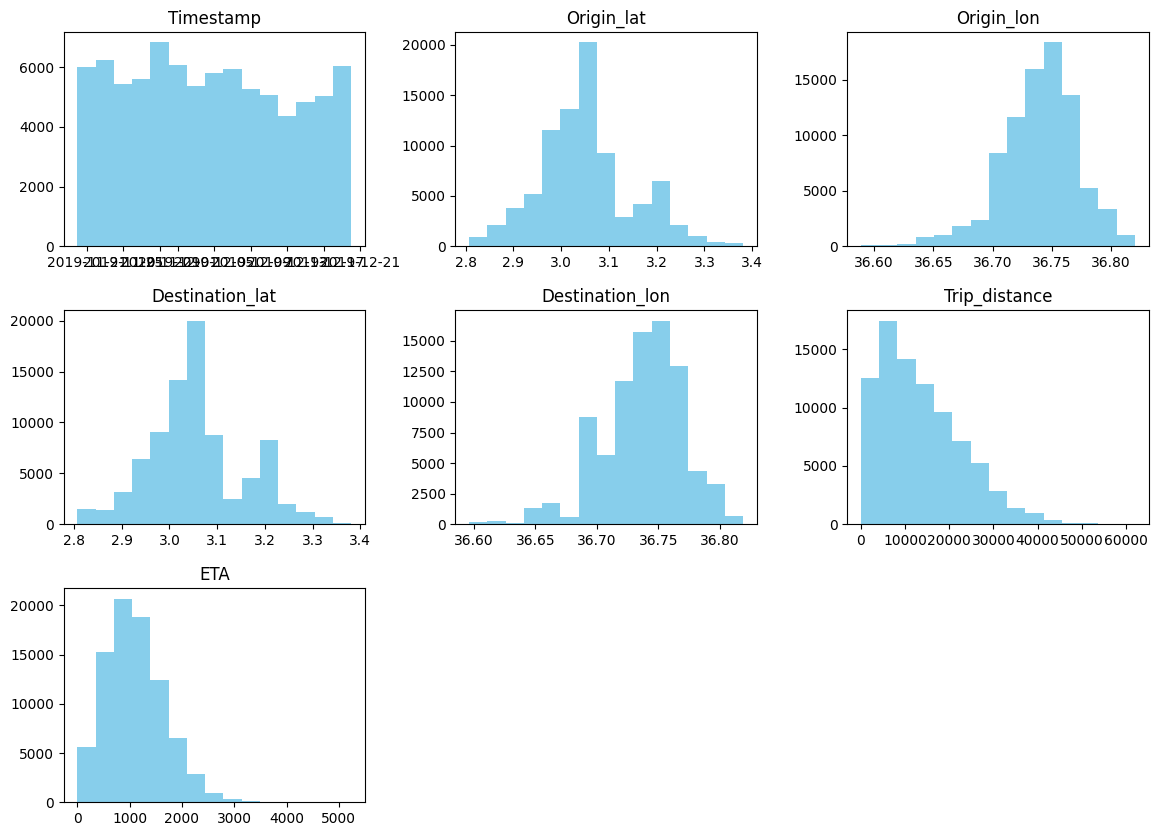

In [23]:
# Histogram showing the distribution of numeric features
train_df.hist(figsize=(14,10), color='skyblue', grid =False , bins =15)
plt.show()

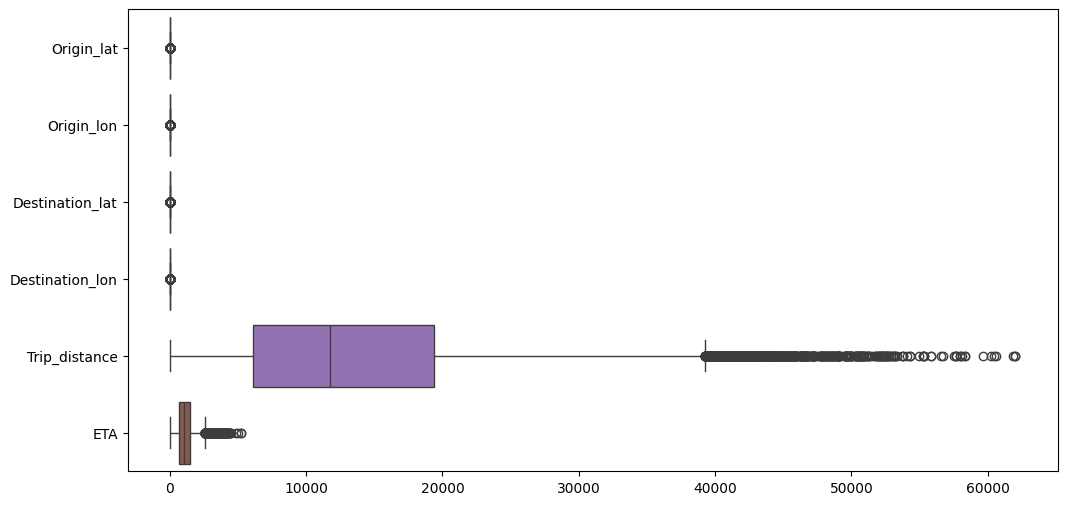

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df, orient='h')
plt.show()

#### Bivariate Analysis

# Data Preparation

# Modeling and Evaluation

# Deployment